Title: Deep Analysis on Trending Youtube Video Statistics
    
Problem:
Data exploration and in-depth analysis on YouTube Trending Video Statistics in United States. 
Insights which tell us what makes videos trending and maybe building a machine learning model which 
can help predict the same.

Business Value\Impact:
It’s a good reference for YouTubers who are interested in making trending videos in the United States. Also, it’s a good reference for considering what kind of trending videos are recommended to appear more often in the suggested list. 


In [177]:
import pandas as pd
import re 

df = pd.read_csv('/home/liyan/Desktop/Capstone Project #1/USvideos.csv')
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


There is catecory_id confusion for ID '43', which contains both 'Film and Animation' and 'Smart Phone'. I reclassify the videos from "CNET" channel to category_id "3" as 'Smart Phone'.

In [178]:
for i in range(len(df)):
    if df.channel_title[i] == 'CNET':
        df.category_id[i] = '3'
    elif df.category_id[i] == '43':
         df.category_id[i] = '1'
#df.category_id.drop_duplicates()    

df[df.category_id == 3].head(2)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
7854,lM0yu7c6lQk,17.23.12,You're not crazy. Apple is slowing down older ...,CNET,3,2017-12-22T01:16:16.000Z,"Apple|""iPhone Slowdown""|""Apple Battery""|""Cultu...",110112,3547,180,1426,https://i.ytimg.com/vi/lM0yu7c6lQk/default.jpg,False,False,False,Apple comes clean after overwhelming evidence ...
8077,lM0yu7c6lQk,17.24.12,You're not crazy. Apple is slowing down older ...,CNET,3,2017-12-22T01:16:16.000Z,"Apple|""iPhone Slowdown""|""Apple Battery""|""Cultu...",134433,4080,202,1645,https://i.ytimg.com/vi/lM0yu7c6lQk/default.jpg,False,False,False,Apple comes clean after overwhelming evidence ...


In [189]:
# Add a catrgory_name column to the dataframe based on its category_id.
list = sorted(df.category_id.drop_duplicates())
list
cat_name = ['Film and Animation', 'Cars and Vehicles', 'Smart Phone', 'Music', 'Pets and Animals', 'Sports', 'Travel', 'Game', 'People and Blogs', 'Comedy', 'Entertainment', 'News and Politics', 'How to and Style', 'Education', 'Science and Technology', 'Nonprofits and Activism', 'News & Politics']
dic_raw = dict(zip(list, cat_name))
dic_raw

df['category_name'] = df.category_id.apply(lambda row : dic_raw[row])
df.head(2)


,video_id,trending_month,title,channel_title,category_id,publish_hour,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,0,0,0,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People and Blogs
1,1ZAPwfrtAFY,11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,7,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,0,0,0,"One year after the presidential election, John...",Entertainment


In [180]:
df_month = df.trending_date.apply(lambda x: re.search('(\d+)\.(\d+)\.(\d+)', x).group(3))
df.trending_date = df_month.astype(int)

df_publish_time = df.publish_time.apply(lambda x : re.search(r"(?<=T).*?(?=:)", x).group(0))
df.publish_time = df_publish_time.astype(int)
df[['comments_disabled', 'ratings_disabled', 'video_error_or_removed']] = df[['comments_disabled', 'ratings_disabled', 'video_error_or_removed']].astype(int)


df.columns = ['video_id','trending_month','title','channel_title','category_id','publish_hour','tags','views','likes','dislikes','comment_count','thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed','description','category_name']
df.head(2)

,video_id,trending_month,title,channel_title,category_id,publish_hour,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,0,0,0,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People and Blogs
1,1ZAPwfrtAFY,11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,7,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,0,0,0,"One year after the presidential election, John...",Entertainment


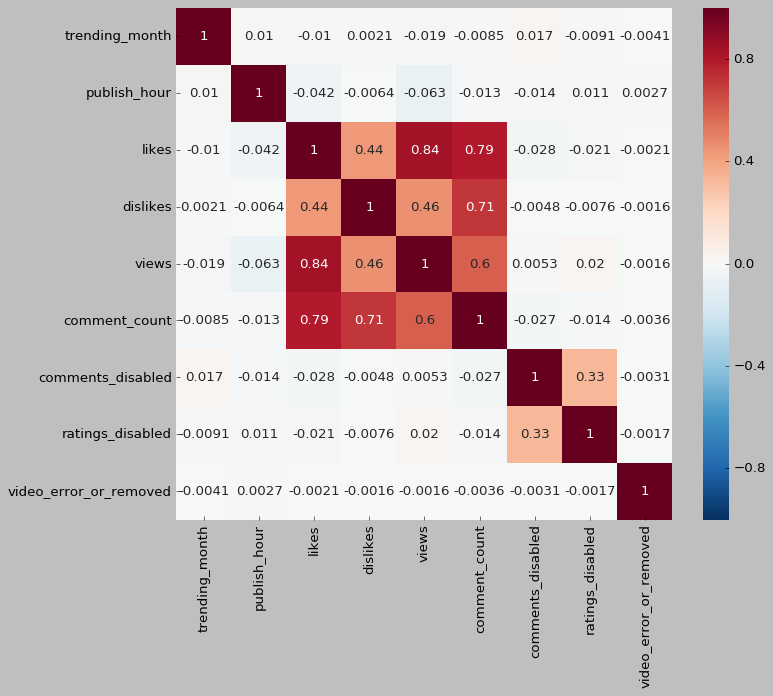

In [181]:
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.heatmap(df[['trending_month', 'publish_hour','likes','dislikes','views','comment_count','comments_disabled','ratings_disabled','video_error_or_removed']].corr(), annot=True)
plt.show()

In [182]:
dic = df[['category_id','category_name','views','likes','dislikes','comment_count']].groupby('category_name').sum()[:10].to_dict()
dic

{'category_id': {'Cars and Vehicles': 768,
  'Comedy': 72933,
  'Education': 42444,
  'Entertainment': 218856,
  'Film and Animation': 2100,
  'Game': 12800,
  'How to and Style': 99736,
  'Music': 56520,
  'News & Politics': 1376,
  'News and Politics': 59800},
 'comment_count': {'Cars and Vehicles': 784447,
  'Comedy': 19482683,
  'Education': 4876603,
  'Entertainment': 65260628,
  'Film and Animation': 14383610,
  'Game': 8974873,
  'How to and Style': 20431274,
  'Music': 101567787,
  'News & Politics': 58909,
  'News and Politics': 5638212},
 'dislikes': {'Cars and Vehicles': 243010,
  'Comedy': 6304534,
  'Education': 1249335,
  'Entertainment': 38822391,
  'Film and Animation': 5008698,
  'Game': 4551823,
  'How to and Style': 4659432,
  'Music': 41098935,
  'News & Politics': 16062,
  'News and Politics': 3985957},
 'likes': {'Cars and Vehicles': 4245656,
  'Comedy': 192512229,
  'Education': 42931493,
  'Entertainment': 459483306,
  'Film and Animation': 129820163,
  'Game': 

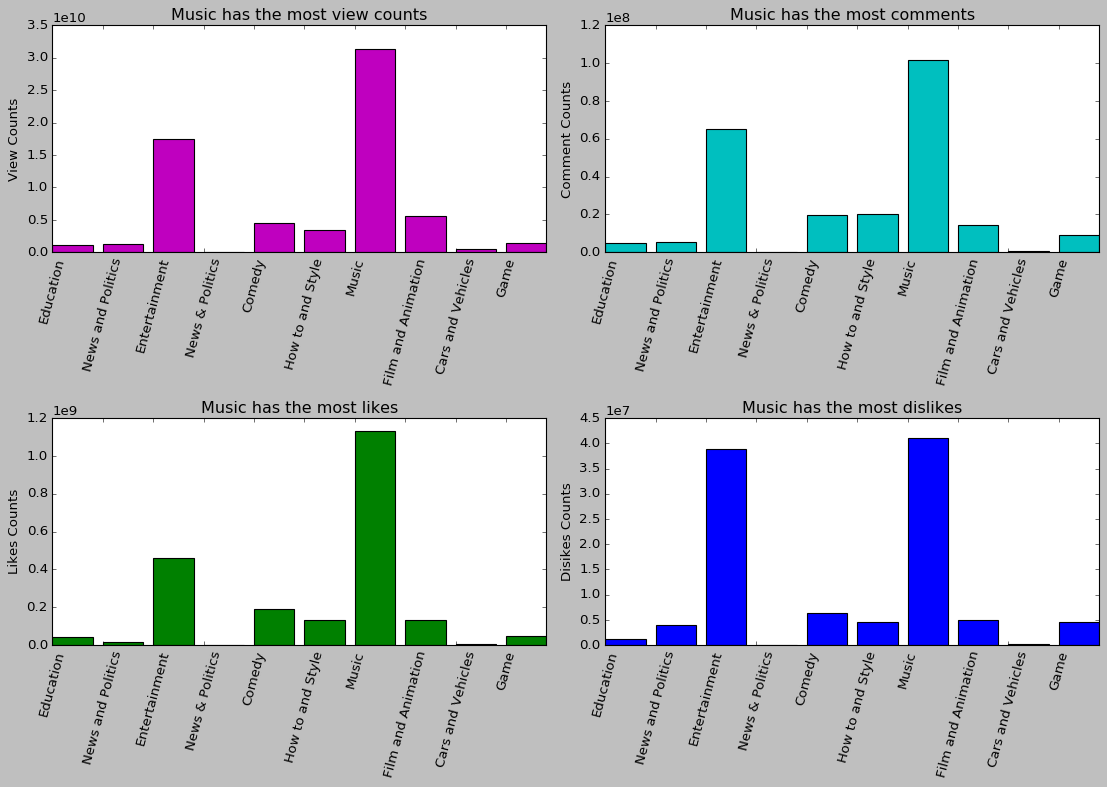

In [184]:
plt.figure(figsize = (14,10))

plt.subplot(2,2,1)
plt.xticks(range(len(dic['views'])), dic['views'].keys(), rotation = 75)
plt.bar(range(len(dic['views'])),dic['views'].values(), color = 'm')
        
plt.title('Music has the most view counts')
plt.ylabel('View Counts')

plt.subplot(2,2,2)
plt.xticks(range(len(dic['comment_count'])), dic['comment_count'].keys(), rotation = 75)
plt.bar(range(len(dic['comment_count'])),dic['comment_count'].values(), color = 'c')
        
plt.title('Music has the most comments')
plt.ylabel('Comment Counts')

plt.subplot(2,2,3)
plt.xticks(range(len(dic['likes'])), dic['likes'].keys(), rotation = 75)
plt.bar(range(len(dic['likes'])),dic['likes'].values(), color = 'g')
        
plt.title('Music has the most likes')
plt.ylabel('Likes Counts')

plt.subplot(2,2,4)
plt.xticks(range(len(dic['dislikes'])), dic['dislikes'].keys(), rotation = 75)
plt.bar(range(len(dic['dislikes'])),dic['dislikes'].values(), color = 'b')
        
plt.title('Music has the most dislikes')
plt.ylabel('Disikes Counts')


plt.tight_layout()
plt.show()

In [190]:
df.head(2)

,video_id,trending_month,title,channel_title,category_id,publish_hour,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,0,0,0,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People and Blogs
1,1ZAPwfrtAFY,11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,7,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,0,0,0,"One year after the presidential election, John...",Entertainment


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


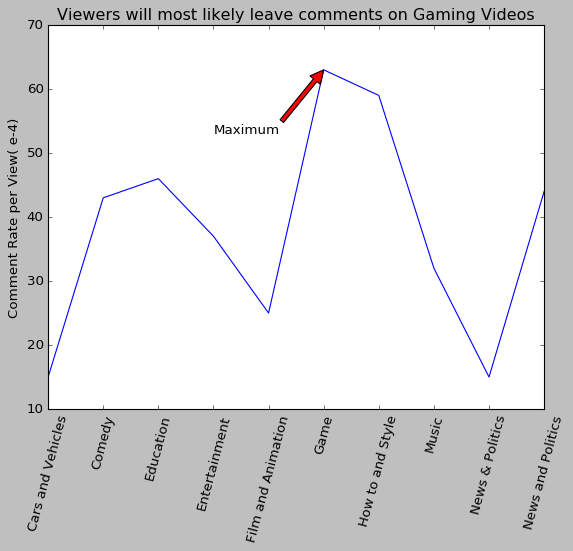

In [196]:
import numpy as np
from decimal import Decimal

df_ratio = df[['category_id','category_name','views','likes','dislikes','comment_count','trending_month']].groupby('category_name').sum()


df_ratio_comment = df_ratio[['views', 'comment_count']]

df_ratio_comment['ratio']=range(len(df_ratio_comment))
for i in range(len(df_ratio_comment)):
   df_ratio_comment['ratio'][i] = df_ratio_comment.comment_count[i]/df_ratio_comment.views[i]*10000

df_ratio_comment = df_ratio_comment[:10]
df_ratio_comment

plt.xticks(range(len(df_ratio_comment)), df_ratio_comment.index, rotation = 75)
plt.plot(range(len(df_ratio_comment)),df_ratio_comment.ratio, color = 'b')
        
plt.title('Viewers will most likely leave comments on Gaming Videos')
plt.ylabel('Comment Rate per View( e-4)')


ratio_max = df_ratio_comment.ratio.max()
ratio_max

plt.annotate('Maximum', xy = (5, ratio_max), xytext=(3, ratio_max-10),arrowprops=dict(facecolor='red'))


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


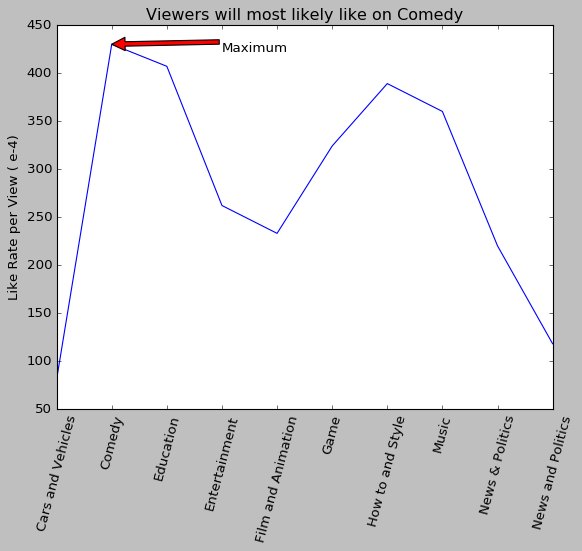

In [197]:
df_likes = df_ratio[['views', 'likes']]

df_likes['ratio']=range(len(df_likes))
for i in range(len(df_likes)):
   df_likes['ratio'][i] = df_likes.likes[i]/df_likes.views[i]* 10000

df_likes = df_likes[:10]
df_likes

plt.xticks(range(len(df_likes)), df_likes.index, rotation = 75)
plt.plot(range(len(df_likes)),df_likes.ratio, color = 'b')
        
plt.title('Viewers will most likely like on Comedy')
plt.ylabel('Like Rate per View ( e-4)')

ratio_max = df_likes.ratio.max()
ratio_max

plt.annotate('Maximum', xy = (1, ratio_max), xytext=(3, ratio_max-8),arrowprops=dict(facecolor='red'))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


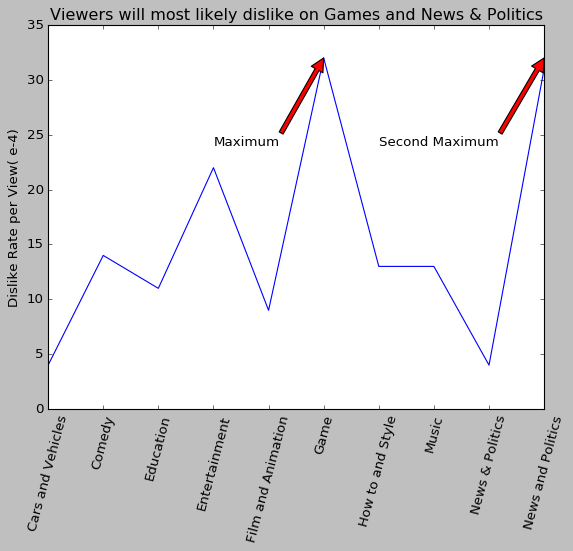

In [198]:

df_dislikes = df_ratio[['views', 'dislikes']]

df_dislikes['ratio']=range(len(df_dislikes))
for i in range(len(df_dislikes)):
   df_dislikes['ratio'][i] = df_dislikes.dislikes[i]/df_dislikes.views[i]* 10000

df_dislikes = df_dislikes[:10]
df_dislikes

plt.xticks(range(len(df_dislikes)), df_dislikes.index, rotation = 75)
plt.plot(range(len(df_dislikes)),df_dislikes.ratio, color = 'b')
        
plt.title('Viewers will most likely dislike on Games and News & Politics')
plt.ylabel('Dislike Rate per View( e-4)')


ratio_max = df_dislikes.ratio.max()
ratio_max

plt.annotate('Maximum', xy = (5, ratio_max), xytext=(3, ratio_max-8),arrowprops=dict(facecolor='red'))
plt.annotate('Second Maximum', xy = (9, ratio_max), xytext=(6, ratio_max-8),arrowprops=dict(facecolor='red'))

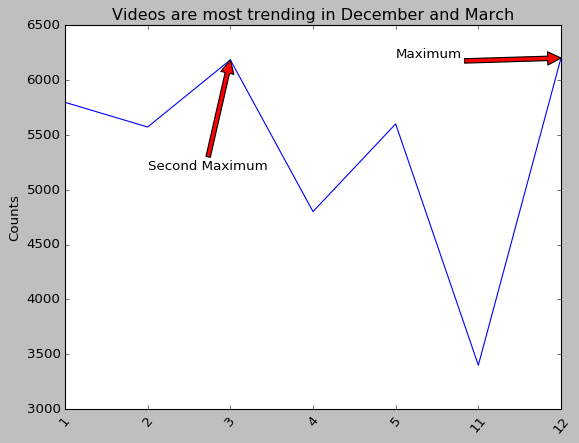

In [248]:
df_month = df.trending_month.value_counts()
df_month = pd.DataFrame(df_month)
df_month = df_month.sort_index()
df_month

plt.xticks(range(len(df_month)), df_month.index, rotation = 50)
plt.plot(range(len(df_month)),df_month.trending_month, color = 'b')
        
plt.title('Videos are most trending in December and March')
plt.ylabel('Counts')

plt.annotate('Maximum', xy = (6, df_month.max()), xytext=(4, df_month.max()),arrowprops=dict(facecolor='red'))
plt.annotate('Second Maximum', xy = (2, df_month.trending_month[3]), xytext=(1, df_month.trending_month[3]-1000),arrowprops=dict(facecolor='red'))

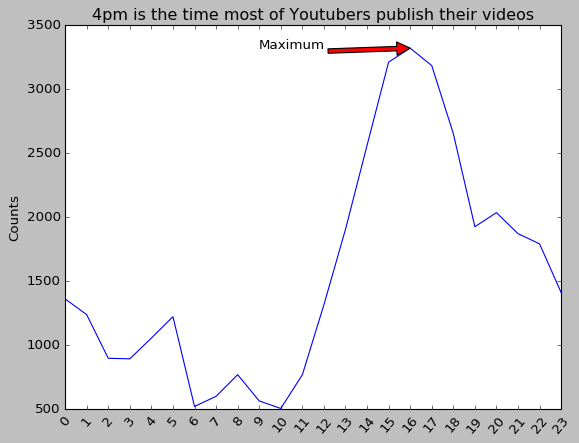

In [253]:
df_publish_hour= df.publish_hour.value_counts()
df_publish_hour = pd.DataFrame(df_publish_hour)
df_publish_hour = df_publish_hour.sort_index()

df_publish_hour

plt.xticks(range(len(df_publish_hour)), df_publish_hour.index, rotation = 50)
plt.plot(range(len(df_publish_hour)),df_publish_hour.publish_hour, color = 'b')
        
plt.title('4pm is the time most of Youtubers publish their videos')
plt.ylabel('Counts')

plt.annotate('Maximum', xy = (16, df_publish_hour.max()), xytext=(9, df_publish_hour.max()),arrowprops=dict(facecolor='red'))